## Especificación del filtro
\begin{align}
    &f_a = 1kHz \\
    &f_p = 2kHz \\
    &f_s = 44.1kHz \\
    &A_a = 40dB \\
    &A_p = 2dB
\end{align}

In [1]:
fa = 1e3
fp = 2e3
fs = 44100
aa = 40
ap = 2

In [27]:
%matplotlib notebook

from matplotlib import pyplot
from scipy import signal
import numpy as np


def hhp(wc: float, fs: float, N: int):
    """ Respuesta impulsiva de un filtro pasa-altos
        ideal, con frecuencia de corte wc.
        :param wc: Frecuencia de corte del filtro ideal
        :param fs: Frecuencia de muestreo
        :param N: Longitud del filtro FIR
    """
    h = np.zeros(N)
    l = int((N - 1) / 2)
    for n in range(-l, l + 1):
        if n == 0:
            h[n + l] = 1 - 2 * (wc / (2 * np.pi * fs))
        else:
            h[n + l] = - np.sin(n * wc / fs) / (n * np.pi)
    return h

def hamming(N: int):
    """ Ventana de Hamming.
        :param N: Longitud de la ventana
    """
    w = np.zeros(N)
    for n in range(N):
        w[n] = 0.54 - 0.46 * np.cos( (2 * np.pi * n) / (N - 1))
    return w

def plot(h, fs):
    """ Grafica la respuesta impulsiva y su respuesta en frecuencia
        :param h: Respuesta impulsiva
        :param fs: Frecuencia de muestreo
    """
    N = len(h)
    z = signal.dlti(
        [h],
        [1 if i == 0 else 0 for i in range(N)],
        dt= 1 / fs
    )
    w, m, p = z.bode(n=100000)
    
    fig, (ax1, ax2) = pyplot.subplots(2, 1)

    fig.set_figwidth(10)
    fig.set_figheight(7)
    
    ax1.stem(h, label="$h(n)$", use_line_collection=True)
    ax1.legend(fontsize=15)
    ax1.grid()
    
    ax2.semilogx(w / (2 * np.pi), m, label="$H(w)$")
    ax2.legend(fontsize=15)
    ax2.grid()
    
    pyplot.show()

In [28]:
N = 177
wc = 2 * np.pi * (fp + fa) / 2
h = hhp(wc, fs, N) * hamming(N)

<IPython.core.display.Javascript object>


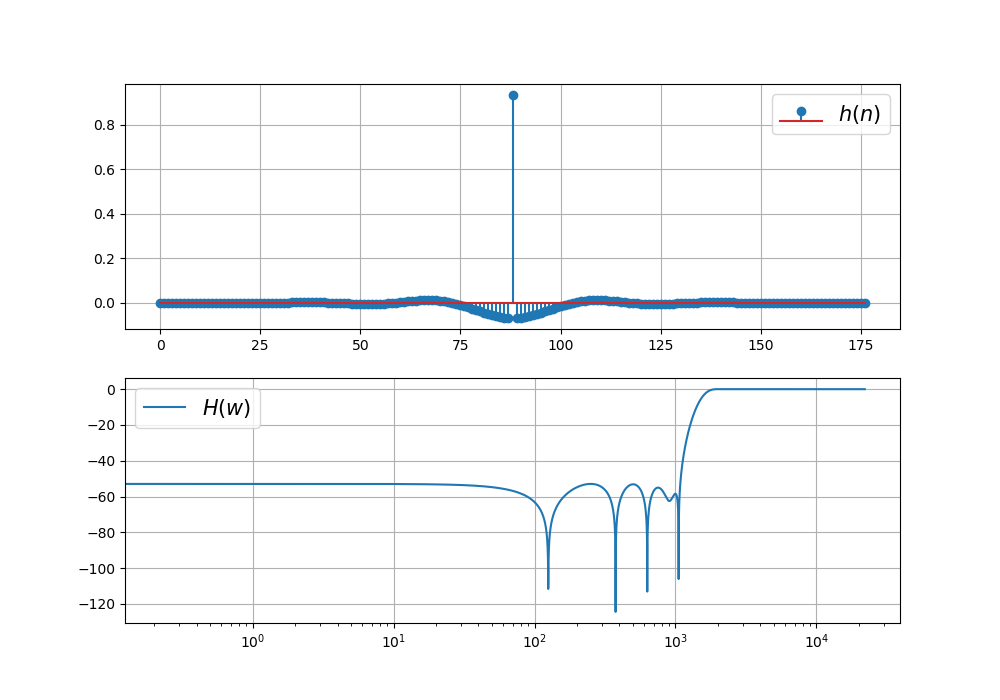

In [29]:
plot(h, fs)